In [1]:
import numpy as np
import pandas as pd
import _pickle as pickle

In [2]:
with open('iris.dat', 'rb') as fp:
    X_train = pickle.load(fp)
    X_train_std = pickle.load(fp)
    X_test = pickle.load(fp)
    X_test_std = pickle.load(fp)
    y_train = pickle.load(fp)
    y_test = pickle.load(fp)

In [3]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (400, 6)
X_test shape:  (100, 6)
y_train shape:  (400,)
y_test shape:  (100,)


# logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [5]:
log_model = LogisticRegression(solver = 'lbfgs', random_state = 42)
log_scores = cross_val_score(log_model, X_train_std, y_train, cv = 10)
print("log_scores: ", log_scores)
print("Mean score: ", log_scores.mean())
print("Std deviation: ", log_scores.std())

log_scores:  [0.65  0.625 0.75  0.7   0.6   0.55  0.575 0.625 0.65  0.65 ]
Mean score:  0.6375
Std deviation:  0.05505678886386309


In [6]:
log_model.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
log_reg_score = log_model.score(X_test_std, y_test)
print(log_reg_score)

0.62


In [8]:
log_yy_pred = log_model.predict(X_test_std)

In [9]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_true=y_test, y_pred=log_yy_pred)
print(confMatrix)

[[41  9]
 [29 21]]


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=log_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=log_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=log_yy_pred))

Precision: 0.700
Recall: 0.420
F1: 0.525


# SVM

## linear kernel

In [11]:
from sklearn.svm import SVC

In [12]:
svm_linear_model = SVC(C=17, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
svm_linear_scores = cross_val_score(svm_linear_model, X_train_std, y_train, cv = 10)
print("svm_linear_scores: ", svm_linear_scores)
print("Mean score: ", svm_linear_scores.mean())
print("Std deviation: ", svm_linear_scores.std())

svm_linear_scores:  [0.75  0.625 0.7   0.725 0.65  0.575 0.6   0.65  0.7   0.6  ]
Mean score:  0.6575
Std deviation:  0.055957573213998475


In [14]:
svm_linear_model.fit(X_train_std, y_train)
svm_linear_score = svm_linear_model.score(X_test_std, y_test)
svm_linear_score

0.58

In [15]:
svm_linear_yy_pred = svm_linear_model.predict(X_test_std) 
svm_linear_yy_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [16]:
svm_linear_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=svm_linear_yy_pred)
print(svm_linear_model_confMatrix)

[[45  5]
 [37 13]]


In [17]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=svm_linear_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=svm_linear_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=svm_linear_yy_pred))

Precision: 0.722
Recall: 0.260
F1: 0.382


# rbf kernel

In [18]:
#Best estimator obtained from rbf file
svm_rbf_model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.9999999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
svm_rbf_scores = cross_val_score(svm_rbf_model, X_train_std, y_train, cv = 10)
print("svm_linear_scores: ", svm_rbf_scores)
print("Mean score: ", svm_rbf_scores.mean())
print("Std deviation: ", svm_rbf_scores.std())

svm_linear_scores:  [0.775 0.7   0.75  0.775 0.675 0.675 0.575 0.675 0.825 0.625]
Mean score:  0.705
Std deviation:  0.0722841614740048


In [20]:
svm_rbf_model.fit(X_train_std, y_train)
svm_rbf_score = svm_rbf_model.score(X_test_std, y_test)
svm_rbf_score

0.71

In [21]:
svm_rbf_yy_pred = svm_rbf_model.predict(X_test_std) 

In [22]:
svm_rbf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=svm_rbf_yy_pred)
print(svm_rbf_model_confMatrix)

[[41  9]
 [20 30]]


In [23]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=svm_rbf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=svm_rbf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=svm_rbf_yy_pred))

Precision: 0.769
Recall: 0.600
F1: 0.674


 # decision tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# using hyperparameter dec_tree
tree_clf_model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [26]:
tree_clf_scores = cross_val_score(tree_clf_model, X_train_std, y_train, cv = 10)
print("svm_linear_scores: ", tree_clf_scores)
print("Mean score: ", tree_clf_scores.mean())
print("Std deviation: ", tree_clf_scores.std())

svm_linear_scores:  [0.65  0.7   0.8   0.75  0.6   0.725 0.575 0.65  0.675 0.65 ]
Mean score:  0.6775
Std deviation:  0.06466258578188783


In [27]:
tree_clf_model.fit(X_train_std, y_train)
tree_clf_score = tree_clf_model.score(X_test_std, y_test)
tree_clf_score

0.69

In [28]:
tree_clf_yy_pred = tree_clf_model.predict(X_test_std)

In [29]:
tree_clf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=tree_clf_yy_pred)
print(tree_clf_model_confMatrix)

[[29 21]
 [10 40]]


In [30]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=tree_clf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=tree_clf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=tree_clf_yy_pred))

Precision: 0.656
Recall: 0.800
F1: 0.721


# adaboost classifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
adaboost_clf = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=0.8999999999999999, n_estimators=20,
          random_state=42)

In [33]:
adaboost_clf_scores = cross_val_score(adaboost_clf,X_train_std,y_train,cv = 10)
print("adaboost_clf_scores:",adaboost_clf_scores)
print("adaboost_clf_mean:",adaboost_clf_scores.mean())
print("adaboost_clf.std:",adaboost_clf_scores.std())

adaboost_clf_scores: [0.7   0.6   0.75  0.775 0.525 0.6   0.625 0.725 0.675 0.65 ]
adaboost_clf_mean: 0.6625
adaboost_clf.std: 0.07352720584926371


In [34]:
adaboost_clf.fit(X_train_std,y_train)
adaboost_score = adaboost_clf.score(X_test_std,y_test)
adaboost_score

0.71

In [35]:
adaboost_yy_pred = adaboost_clf.predict(X_test_std)

In [36]:
adaboost_clf_confMatrix = confusion_matrix(y_true=y_test,y_pred = adaboost_yy_pred)
print(adaboost_clf_confMatrix)

[[36 14]
 [15 35]]


# gradient boosting classification

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
grad_boost_clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=8,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [39]:
grad_boost_clf_scores = cross_val_score(grad_boost_clf,X_train_std,y_train,cv = 10)
print("grad_boost_clf_scores:",grad_boost_clf_scores)
print("grad_boost_clf_mean:",grad_boost_clf_scores.mean())
print("grad_boost_clf.std:",grad_boost_clf_scores.std())

grad_boost_clf_scores: [0.775 0.675 0.775 0.825 0.775 0.675 0.45  0.7   0.55  0.625]
grad_boost_clf_mean: 0.6825
grad_boost_clf.std: 0.11014195385955343


In [40]:
grad_boost_clf.fit(X_train_std,y_train)
grad_boost_clf_score = grad_boost_clf.score(X_test_std,y_test)
grad_boost_clf_score

0.63

In [41]:
grad_boost_pred = grad_boost_clf.predict(X_test_std)

In [42]:
grad_boost_clf_confMatrix = confusion_matrix(y_true=y_test, y_pred=grad_boost_pred)
print(grad_boost_clf_confMatrix)

[[36 14]
 [23 27]]


In [43]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=grad_boost_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=grad_boost_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=grad_boost_pred))

Precision: 0.659
Recall: 0.540
F1: 0.593


# random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rand_forest_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rand_forest_clf_scores = cross_val_score(rand_forest_clf,X_train_std,y_train,cv = 10)
print("rand_forest_clf_scores:",rand_forest_clf_scores)
print("rand_forest_clf _mean:",rand_forest_clf_scores.mean())
print("rand_forest_clf_std:",rand_forest_clf_scores.std())

rand_forest_clf_scores: [0.7   0.65  0.675 0.775 0.625 0.65  0.575 0.7   0.675 0.65 ]
rand_forest_clf _mean: 0.6675
rand_forest_clf_std: 0.05006246098625197


In [47]:
rand_forest_clf.fit(X_train_std,y_train)
rand_forest_clf_score = rand_forest_clf.score(X_test_std,y_test)
rand_forest_clf_score

0.71

In [48]:
rand_forest_clf_pred = rand_forest_clf.predict(X_test_std)

In [49]:
rand_forest_clf_confMatrix = confusion_matrix(y_true=y_test, y_pred=rand_forest_clf_pred)
print(rand_forest_clf_confMatrix)

[[38 12]
 [17 33]]


In [50]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=rand_forest_clf_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=rand_forest_clf_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=rand_forest_clf_pred))

Precision: 0.733
Recall: 0.660
F1: 0.695


# plotting of classification scores

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

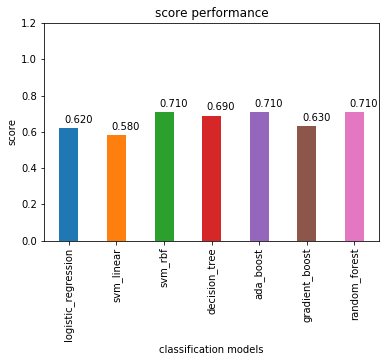

In [52]:
x_plot = range(7)
y_plot = [log_reg_score,svm_linear_score,svm_rbf_score,tree_clf_score,adaboost_score,grad_boost_clf_score,rand_forest_clf_score]
x_label = ["logistic_regression","svm_linear","svm_rbf","decision_tree","ada_boost","gradient_boost","random_forest"]
#plt.bar(x_label[0],y_plot[0],width = 0.5)
#plt.bar(x_label[1],y_plot[1],width = 0.5)
plt.xticks(x_plot,x_label,rotation = 90,color = "black")
#plt.bar(x_plot,y_plot,width = 0.4)
for i in range(7):
    plt.bar(x_plot[i],y_plot[i],width = 0.4)

for j in range(len(x_plot)):
    plt.text(x = x_plot[j]-.10,y = y_plot[j]+0.03,s = "%.3f" %(y_plot[j]),size = 10)
    
    
plt.ylabel("score")
plt.xlabel("classification models")
plt.ylim([0,1.2]) 
plt.title("score performance")
plt.show()